In [42]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import os
import random
from scipy.misc import imresize
import mammo_utils
%matplotlib inline

In [19]:
def load_image(image, mask=None, margin=0.15, base_path= "C:\\Users\\eric\\Documents\\Courses\\Applied ML 2\\mammography\\data\\cbis-ddsm\\"):
    image_path = os.path.join(base_path, image)
    image = PIL.Image.open(image_path)
    image = np.array(image)

    # try to lose the extra channels, if there is an error they don't exist
    try:
        image = image[:,:,0]
    except:
        pass

    if mask is not None:
        mask_path = base_path + mask
        mask = PIL.Image.open(mask_path)
        mask = np.array(mask)
        mask = mask[:,:,0]
        mask = imresize(mask, (h // 2, w // 2))
    
    h = image.shape[0]
    w = image.shape[1]
    
    image = imresize(image, (h // 2, w // 2))
    
    # trim margin off each side
    h_border = int(h * margin)
    w_border = int(w * margin)

    image = image[h_border:(h-h_border),w_border:(w-w_border)]
    
    return image, mask

def stats_on_images(array):
    print("Var:", np.var(array))
    print("Max:", np.max(array))
    print("Min:", np.min(array))
    print("Mean:", np.mean(array)) 
    
def scale_data(input_data, new_min=0.0, new_max=255.0):
    old_max = np.max(input_data)
    old_min = np.min(input_data)
    
    adjustment_factor = (new_max - new_min) / (old_max - old_min)
    scaled_data = adjustment_factor * (input_data - old_min) + new_min
    
    return scaled_data

def per_image_summary(data):
    maxes = []
    mins = []
    means = []
    sigmas = []
    
    for item in data:
        maxes.append(np.max(item))
        mins.append(np.min(item))
        means.append(np.mean(item))
        sigmas.append(np.std(item))
        
    return maxes, mins, means, sigmas

def plot_data_summaries(data):
    maxes, mins, means, sigmas = per_image_summary(data)
    
    f, ax = plt.subplots(1, 4, figsize=(24, 5))
    
    ax[0].hist(maxes, bins=np.arange(0,250,25))
    ax[0].set_title("Max")
    
    ax[1].hist(mins, bins=np.arange(0,250,25))
    ax[1].set_title("Min")
    
    ax[2].hist(means, bins=np.arange(0,250,25))
    ax[2].set_title("Mean")
    
    ax[3].hist(sigmas, bins=np.arange(0,80,10))
    ax[3].set_title("Std")
    
def adjust_contrast(data, contrast):
    mu = np.mean(data)
    
    data = (data - mu) * contrast + mu
    
    return data


def summarize(data):
    print("Mean:", np.mean(data))
    print("Min:", np.min(data))
    print("Max:", np.max(data))
    print("Std:", np.std(data))

C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


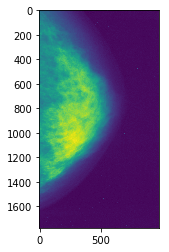

In [17]:
dba_image, _ = load_image("A_0497_1.RIGHT_CC.LJPEG.png", base_path = "E:\\Documents\\Mammography\\DDSM\\PNGs\\DBA pngs")
plt.imshow(dba_image)

In [20]:
summarize(dba_image)

Mean: 51.43681504665855
Min: 8
Max: 195
Std: 52.32203499795674


C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


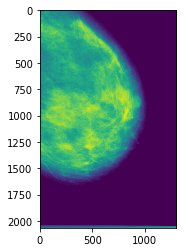

In [23]:
calc_train_image, _ = load_image("P_00012_LEFT_MLO_FULL.jpg", base_path = "C:\\Users\\eric\\Documents\\Courses\\Applied ML 2\\mammography\\data\\cbis-ddsm\\Calc Train All Full JPEGs")
plt.imshow(calc_train_image)

In [24]:
summarize(calc_train_image)

Mean: 64.19349479409705
Min: 0
Max: 213
Std: 69.15935101319302


C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


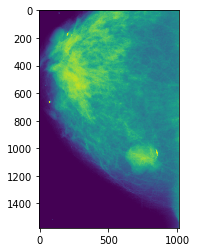

In [31]:
mass_train_image, _ = load_image("P_00044_RIGHT_CC_FULL.jpg", base_path = "C:\\Users\\eric\\Documents\\Courses\\Applied ML 2\\mammography\\data\\cbis-ddsm\\Mass Train All JPEGs Full")
plt.imshow(mass_train_image)

In [32]:
summarize(mass_train_image)

Mean: 89.6308752109798
Min: 0
Max: 251
Std: 66.73778718427575


C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


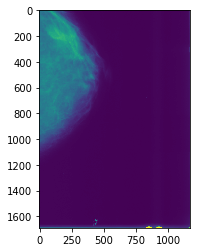

In [37]:
lumisys_image, _ = load_image("B_3629_1.LEFT_CC.LJPEG.png", base_path = "E:\\Documents\\Mammography\\DDSM\\PNGs\\Lumisys pngs")
plt.imshow(lumisys_image)

In [43]:
summarize(lumisys_image)

Mean: 22.35158448705159
Min: 2
Max: 255
Std: 38.71944394274468


In [47]:
lumisys_image_contrast = scale_data(adjust_contrast(lumisys_image, 1.1))
summarize(lumisys_image_contrast)

Mean: 20.512466577858326
Min: 0.0
Max: 255.0
Std: 39.0255265035569


C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


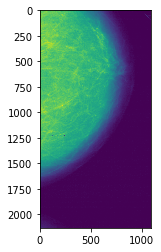

In [29]:
howtek_image, _ = load_image("A_2032_1.RIGHT_CC.LJPEG.png", base_path = "E:\\Documents\\Mammography\\DDSM\\PNGs\\Howtek pngs")
plt.imshow(howtek_image)

In [30]:
summarize(howtek_image)

Mean: 44.289119837076484
Min: 0
Max: 153
Std: 48.262978997002406


In [34]:
howtek_slices = np.load("E:\\Documents\\Mammography\\data\\howtek_slices9.npy")

In [35]:
summarize(howtek_slices)

Mean: 92.03267144602907
Min: 0
Max: 226
Std: 30.98287152141188


In [36]:
lumisys_slices = np.load("E:\\Documents\\Mammography\\data\\lumisys_slices9.npy")
summarize(lumisys_slices)

Mean: 104.12829200685927
Min: 5
Max: 225
Std: 35.55229810198864
